In [338]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# **ANALISIS EXPLORATORIO**

Cargamos e inspeccionamos los datos

In [339]:
Ctrl_trillado = pd.read_excel('CC FT 17   Formato de Control de Calidad Café de Trillado (1).xlsx', header = 5)
Formato_tostion = pd.read_excel('CC FT 18  Formato de  Tostión (1).xlsx', header = 5)
Formato_Despachos = pd.read_excel('CC FT 21   Formato de Control de Despachos (1).xlsx', header = 5)

In [341]:
print('info de tablas:')
print(Ctrl_trillado.info(),Formato_tostion.info(),Formato_Despachos.info())

info de tablas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   FECHA                              80 non-null     object 
 1   LOTE                               76 non-null     object 
 2   DENOMINACIÓN/     MARCA            76 non-null     object 
 3   CANTIDAD                           76 non-null     float64
 4   %H                                 77 non-null     object 
 5   Unnamed: 5                         78 non-null     object 
 6   MALLAS                             77 non-null     object 
 7   Unnamed: 7                         77 non-null     object 
 8   VERIFICACIÓN FISICA CAFÉ TOSTADO   77 non-null     object 
 9   NOTAS DE CATACIÓN                  76 non-null     object 
 10  PUNTAJE                            76 non-null     object 
 11  Unnamed: 11                        77 non-nu

In [342]:
print(Ctrl_trillado.head())
print(Formato_tostion.head())
print(Formato_Despachos.head())

      FECHA     LOTE   DENOMINACIÓN/     MARCA  CANTIDAD    %H Unnamed: 5  \
0       NaN        NaN                     NaN       NaN   NaN        NaN   
1       NaN        NaN                     NaN       NaN     %       C/NC   
2  19-07-22  01-190722            Madre Laura      765.0  10.9         C    
3   19-7-22  09-190722           Tabi Natural      204.0  10.2          C   
4  19-07-22  10-190722              Don Mario      165.0  10.7          C   

  MALLAS Unnamed: 7 VERIFICACIÓN FISICA CAFÉ TOSTADO   \
0    NaN        NaN                               NaN   
1      #       C/NC                              C/NC   
2     14         C                                  C   
3     14          C                                 C   
4     14          C                                 C   

                                   NOTAS DE CATACIÓN PUNTAJE Unnamed: 11  \
0                                                NaN     NaN         NaN   
1                                         

In [343]:
print('columnas de las tablas: ')
print(Ctrl_trillado.columns)
print(Formato_tostion.columns)
print(Formato_Despachos.columns)

columnas de las tablas: 
Index(['FECHA', 'LOTE  ', 'DENOMINACIÓN/     MARCA', 'CANTIDAD', '%H',
       'Unnamed: 5', 'MALLAS', 'Unnamed: 7',
       'VERIFICACIÓN FISICA CAFÉ TOSTADO ', 'NOTAS DE CATACIÓN', 'PUNTAJE',
       'Unnamed: 11', 'LIBERACIÓN DE LOTE', 'RESPONSABLE '],
      dtype='object')
Index(['Fecha ', 'Lote ', 'Origen', 'Variedad', 'Proceso', 'Beneficio ',
       'Peso en Verde', 'Merma ', 'Peso en Tostado ', 'Perfil ',
       'Temp. De inicio y final', 'Tiempo de tueste', 'Observaciones ',
       'Tostador'],
      dtype='object')
Index(['# PEDIDO ', 'FECHA DE TUESTE ', 'FECHA DE EMPAQUE ', 'TIPO DE CAFÉ   ',
       'PRESENTACIÓN ', 'Unnamed: 5', 'CANTIDAD ', 'Unnamed: 7', 'Unnamed: 8',
       'CLIENTE ', 'RESPONSABLE DESPACHO ', 'VERIFICA '],
      dtype='object')


Identificacion y limpieza de columnas importantes

In [344]:
Calidad = Ctrl_trillado[['CANTIDAD','%H','MALLAS']].dropna()
Tostion = Formato_tostion[['Merma ','Variedad', 'Origen','Temp. De inicio y final','Tiempo de tueste','Proceso','Beneficio ']].dropna()
Despachos =Formato_Despachos[['CANTIDAD ']].dropna()
Tostion['Perdida de Peso'] = Formato_tostion['Peso en Verde'] - Formato_tostion['Peso en Tostado ']

In [393]:
print(Calidad.info())
print(Tostion.info())
print(Despachos.info())

<class 'pandas.core.frame.DataFrame'>
Index: 76 entries, 2 to 77
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CANTIDAD  76 non-null     float64
 1   %H        76 non-null     float64
 2   MALLAS    76 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 2.4 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Merma                    499 non-null    float64
 1   Variedad                 499 non-null    int64  
 2   Origen                   499 non-null    int64  
 3   Temp. De inicio y final  499 non-null    int64  
 4   Tiempo de tueste         499 non-null    int64  
 5   Proceso                  499 non-null    int64  
 6   Beneficio                499 non-null    int64  
 7   Perdida de Peso          499 non-null    float64
dtypes: f

In [346]:
print(Calidad.head())
print(Tostion.head())
print(Despachos.head())

   CANTIDAD    %H MALLAS
2    765.00  10.9     14
3    204.00  10.2     14
4    165.00  10.7     14
5      0.45  10.5     14
6    105.00  10.7     14
      Merma   Variedad           Origen Temp. De inicio y final  \
0  15.000000  Dos mil            Jerico               175°/191°   
1  16.666667  Dos mil            Jerico               175°/195°   
2  16.444444  Dos mil            Jerico               175°/190°   
3  16.324786  Dos mil            Jerico               175°/191°   
4  24.444444     Tabi   Ciudad Bolivar                150°/186°   

  Tiempo de tueste      Proceso Beneficio   Perdida de Peso  
0         08:01:00  Tradicional    Lavado              1.35  
1         08:42:00  Tradicional    Lavado              0.50  
2         07:58:00  Tradicional    Lavado              1.48  
3         08:02:00  Tradicional    Lavado              1.91  
4         08:10:00     Natural    Natural              0.11  
   CANTIDAD 
1        3.0
2        1.0
3        2.0
4        1.0
5        3

In [347]:
le = LabelEncoder()
Tostion['Variedad'] = le.fit_transform(Tostion['Variedad'])
Tostion['Origen'] = le.fit_transform(Tostion['Origen'])
Tostion['Temp. De inicio y final'] = le.fit_transform(Tostion['Temp. De inicio y final'])
Tostion['Tiempo de tueste'] = le.fit_transform(Tostion['Tiempo de tueste'])
Tostion['Proceso'] = le.fit_transform(Tostion['Proceso'])
Tostion['Beneficio '] = le.fit_transform(Tostion['Beneficio '])

Homogenizacion de los datos (float64)

In [348]:
Calidad = Calidad.apply(lambda col: pd.to_numeric(col, errors='coerce') if col.dtypes == 'object' else col)
Tostion = Tostion.apply(lambda col: pd.to_numeric(col, errors='coerce') if col.dtypes == 'object' else col)
Despachos = Despachos.apply(lambda col: pd.to_numeric(col, errors='coerce') if col.dtypes == 'object' else col)

In [350]:
print(Calidad.info())
print(Tostion.info())
print(Despachos.info())

<class 'pandas.core.frame.DataFrame'>
Index: 76 entries, 2 to 77
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CANTIDAD  76 non-null     float64
 1   %H        76 non-null     float64
 2   MALLAS    76 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 2.4 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Merma                    499 non-null    float64
 1   Variedad                 499 non-null    int64  
 2   Origen                   499 non-null    int64  
 3   Temp. De inicio y final  499 non-null    int64  
 4   Tiempo de tueste         499 non-null    int64  
 5   Proceso                  499 non-null    int64  
 6   Beneficio                499 non-null    int64  
 7   Perdida de Peso          499 non-null    float64
dtypes: f

# **Definición de variables y preprocesamiento**

se escoje la variable objetivo y las variables de enrtada

In [351]:
VariableObjetivoY = Ctrl_trillado[['PUNTAJE']]
VariableEntradaX = pd.concat([Calidad[0:95], Tostion[0:95]], axis=1) #[omitiendo el [0:95], el RMSE = 346.91] y R2 = 0.99

In [352]:
print(VariableObjetivoY.info())
print(VariableEntradaX.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   PUNTAJE  76 non-null     object
dtypes: object(1)
memory usage: 892.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
Index: 95 entries, 2 to 94
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CANTIDAD                 76 non-null     float64
 1   %H                       76 non-null     float64
 2   MALLAS                   76 non-null     float64
 3   Merma                    95 non-null     float64
 4   Variedad                 95 non-null     int64  
 5   Origen                   95 non-null     int64  
 6   Temp. De inicio y final  95 non-null     int64  
 7   Tiempo de tueste         95 non-null     int64  
 8   Proceso                  95 non-null     int64  
 9   Beneficio                95 non-null    

vemos que hay una incongruencia con la cantidad de valores, asi que para reemplazar los NaN usaremos la Media

In [353]:
VariableEntradaX['CANTIDAD'] = VariableEntradaX['CANTIDAD'].fillna(VariableEntradaX['CANTIDAD'].mean())
VariableEntradaX['%H'] = VariableEntradaX['%H'].fillna(VariableEntradaX['%H'].mean())
VariableEntradaX['MALLAS'] = VariableEntradaX['MALLAS'].fillna(VariableEntradaX['MALLAS'].mean())

In [354]:
print(VariableObjetivoY.info())
print(VariableEntradaX.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   PUNTAJE  76 non-null     object
dtypes: object(1)
memory usage: 892.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
Index: 95 entries, 2 to 94
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CANTIDAD                 95 non-null     float64
 1   %H                       95 non-null     float64
 2   MALLAS                   95 non-null     float64
 3   Merma                    95 non-null     float64
 4   Variedad                 95 non-null     int64  
 5   Origen                   95 non-null     int64  
 6   Temp. De inicio y final  95 non-null     int64  
 7   Tiempo de tueste         95 non-null     int64  
 8   Proceso                  95 non-null     int64  
 9   Beneficio                95 non-null    

Prosigo con el escalado


In [355]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(VariableEntradaX)
X_scaled = pd.DataFrame(X_scaled, columns=VariableEntradaX.columns)

In [356]:
print(X_scaled.head(20))
X = X_scaled[0:95].dropna()
print(X.info())

    CANTIDAD        %H    MALLAS    Merma   Variedad    Origen  \
0   3.778085  1.678741 -0.217762 -0.256138 -0.312744  0.293408   
1   0.422883 -1.756221 -0.217762 -0.314413 -0.312744  0.293408   
2   0.189633  0.697323 -0.217762  3.640015  2.916681 -3.051441   
3  -0.794500 -0.284095 -0.217762  3.640015 -0.312744  0.293408   
4  -0.169212  0.697323 -0.217762 -0.791672 -0.312744  0.293408   
5  -0.169212  0.697323 -0.217762 -0.310251 -0.312744  0.293408   
6   0.458767  0.697323 -0.217762 -0.147911 -0.312744  0.293408   
7  -0.725422 -1.265512 -0.217762 -0.553760 -0.312744  0.293408   
8  -0.681165 -0.284095 -0.217762 -0.147911 -0.312744  0.293408   
9  -0.587865  1.188032 -0.217762 -0.147911  2.916681 -3.051441   
10 -0.378538  0.697323 -0.217762 -0.147911 -0.312744  0.293408   
11  2.701550  3.150867 -0.217762 -0.332008 -0.312744  0.293408   
12  0.458767 -0.284095 -0.217762 -0.147911 -0.312744  0.293408   
13  0.040114  3.150867 -0.217762 -0.147911 -2.896284  0.293408   
14 -0.1931

division de los datos en conjuntos de prueba y entrenamiento


In [357]:
VariableObjetivoY = pd.to_numeric(VariableObjetivoY['PUNTAJE'], errors='coerce')

In [358]:
x_train, x_test, y_train, y_test = train_test_split(X, VariableObjetivoY[0:95], test_size=0.30, random_state=42)

# **ENTRENAMIENTO DE MODELOS DE REGRESION**

In [385]:
x_train = x_train.dropna()
x_test = x_test.dropna()
y_train = y_train.dropna()
y_test = y_test.dropna()

In [389]:
pd.DataFrame(x_train).to_csv('X_train.csv', index=False)
pd.DataFrame(x_test).to_csv('X_test.csv', index=False)
pd.DataFrame(y_train).to_csv('Y_train.csv', index=False)
pd.DataFrame(y_test).to_csv('Y_test.csv', index=False)

Modelo # y Modelo #2


In [391]:
xTrain = pd.read_csv('X_train.csv').values
xTest = pd.read_csv('X_test.csv').values
yTrain = pd.read_csv('Y_train.csv').values
yTest = pd.read_csv('Y_test.csv').values

In [392]:
Modelo_lr = LinearRegression()
#modelo_rf = RandomForestRegressor(random_state=42)

In [394]:
Modelo_lr.fit(xTrain, yTrain)
#modelo_rf.fit(x_train, y_train)

LinearRegression()

Evaluacion de los modelos

In [399]:
from sklearn.metrics import mean_absolute_error
y_prediccion = Modelo_lr.predict(xTest)
r2 = r2_score(yTest, y_prediccion)
rmse = mean_squared_error(yTest, y_prediccion)
error_abs = mean_absolute_error(yTest, y_prediccion)
print(f'R2 Score: {r2} | RMSE: {rmse} | Absolute Error: {error_abs}')


R2 Score: -0.321574170078031 | RMSE: 1.9189573968824187 | Absolute Error: 1.0914143030532366


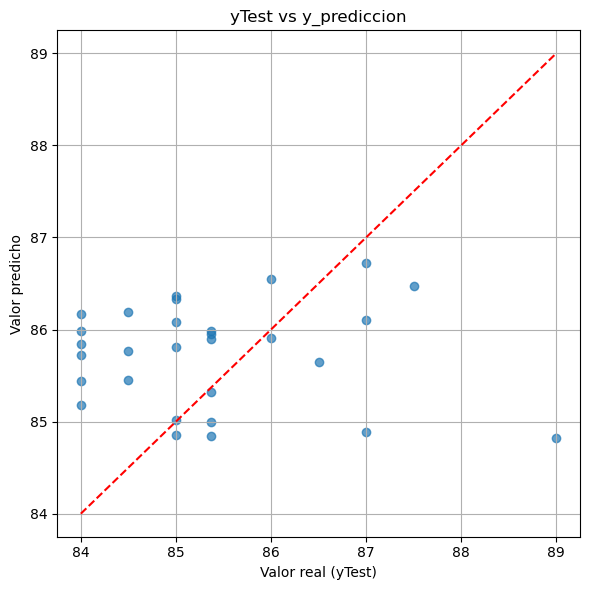

In [398]:
plt.figure(figsize=(6, 6))
plt.scatter(yTest, y_prediccion, alpha=0.7)
plt.plot([yTest.min(), yTest.max()], [yTest.min(), yTest.max()], 'r--')  # línea ideal
plt.title('yTest vs y_prediccion')
plt.xlabel('Valor real (yTest)')
plt.ylabel('Valor predicho')
plt.grid(True)
plt.tight_layout()
plt.show()


In [377]:
#modelos = [('Regresion lineal',Modelo_lr),('Random Forest',modelo_rf)]
'''
for name, model in modelos:
    y_pred = model.predict(x_test)
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} -> RMSE: {rmse:.2f} | R2: {r2:.2f}')'''



Regresion lineal -> RMSE: 1.92 | R2: -0.32
Random Forest -> RMSE: 1.49 | R2: -0.02


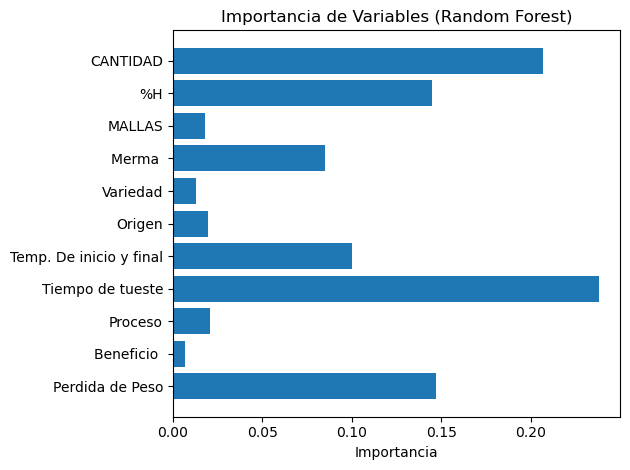

In [378]:
import matplotlib.pyplot as plt

importances = modelo_rf.feature_importances_
plt.barh(x_train.columns, importances)
plt.title("Importancia de Variables (Random Forest)")
plt.xlabel("Importancia")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()